In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,mean_absolute_error,
                             r2_score,explained_variance_score, accuracy_score)
from sklearn import linear_model
from sklearn import model_selection

%matplotlib inline

# Entrenamiento adecuado (FIFA 18)

Para entrenar un modelo es necesario partir nuestro dataset en dos, un conjunto de entrenamiento y un conjunto de prueba, en algunos casos cuando se quiere optimizar metaparámetros es necesario un tercer conjunto de validación.

Para esta regresión se usarán las estadísticas de los jugadores del FIFA 18 para predecir el *overall* en funcion de sus demás aptitudes.

In [2]:
df =  pd.read_csv('Datos/CompleteDataset.csv.zip', compression='zip')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Content

    Every player featuring in FIFA 18
    70+ attributes
    Player and Flag Images
    Playing Position Data
    Attributes based on actual data of the latest EA's FIFA 18 game
    Attributes include on all player style statistics like Dribbling, Aggression, GK Skills etc.
    Player personal data like Nationality, Photo, Club, Age, Wage, Salary etc.

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club logo', 'value', 'wage', 'special',
       'acceleration', 'aggression', 'agility', 'balance', 'ball control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free kick accuracy', 'gk diving', 'gk handling', 'gk kicking',
       'gk positioning', 'gk reflexes', 'heading accuracy', 'interceptions',
       'jumping', 'long passing', 'long shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short passing', 'shot power',
       'sliding tackle', 'sprint speed', 'stamina', 'standing tackle',
       'strength', 'vision', 'volleys', 'cam', 'cb', 'cdm', 'cf', 'cm', 'id',
       'lam', 'lb', 'lcb', 'lcm', 'ldm', 'lf', 'lm', 'ls', 'lw', 'lwb',
       'preferred positions', 'ram', 'rb', 'rcb', 'rcm', 'rdm', 'rf', 'rm',
       'rs', 'rw', 'rwb', 'st'],
      dtype='object')

In [4]:
#nos quedamos con lo que queremos
cols_new = ['name', 'age', 'overall',
       'value', 
       'acceleration', 'aggression', 'agility', 'balance', 'ball control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'heading accuracy', 'interceptions',
       'jumping', 'long passing', 'long shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short passing', 'shot power',
       'sliding tackle', 'sprint speed', 'stamina', 'standing tackle',
       'strength', 'vision', 'volleys']
df = df [cols_new]

In [5]:
df.dtypes

name                object
age                  int64
overall              int64
value               object
acceleration        object
aggression          object
agility             object
balance             object
ball control        object
composure           object
crossing            object
curve               object
dribbling           object
finishing           object
heading accuracy    object
interceptions       object
jumping             object
long passing        object
long shots          object
marking             object
penalties           object
positioning         object
reactions           object
short passing       object
shot power          object
sliding tackle      object
sprint speed        object
stamina             object
standing tackle     object
strength            object
vision              object
volleys             object
dtype: object

In [6]:
#identificamos las variables numericas y se transforman
num_cols = ['age', 'overall',
       'acceleration', 'aggression', 'agility', 'balance', 'ball control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'heading accuracy', 'interceptions',
       'jumping', 'long passing', 'long shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short passing', 'shot power',
       'sliding tackle', 'sprint speed', 'stamina', 'standing tackle',
       'strength', 'vision', 'volleys']

In [7]:
for i in num_cols:
    print(i)
    print(df[i].unique())

age
[32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47]
overall
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46]
acceleration
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '70+9' '56' '26' '80+1' '35' '36' '32' '49-1' '41'
 '67+2' '37' '28' '33' '20' '79-2' '65-2' '29' '91-2' '74-3' '75+1' '41-6'
 '74+1' '70+3' '17' '75+5' '74+2' '71+2' '68+1' '71+4' '89-2' '25' '27'
 '24' '58-10' '78+1' '86+1' '66-1' '22' '66+1' '15' '74+4' '71-3' '80+2'
 '21' '23' '64-2' '18' '57-4' '78+3' '19' '73+9' '82-3' '68+3' '68+2'
 '55-8' '55-1' '43-2' '77+3' '82+10' '16' '49-10' '72+1' '61+1' '79+8'
 '70-2' '13' '14'

In [8]:
for i in num_cols:
    df[i] = df[i].astype(str).str[:2]

In [9]:
for i in num_cols:
    print(i)
    print(df[i].unique())

age
['32' '30' '25' '31' '28' '26' '27' '29' '39' '23' '24' '35' '33' '34'
 '36' '21' '22' '18' '20' '19' '37' '38' '40' '17' '44' '41' '16' '43'
 '47']
overall
['94' '93' '92' '91' '90' '89' '88' '87' '86' '85' '84' '83' '82' '81'
 '80' '79' '78' '77' '76' '75' '74' '73' '72' '71' '70' '69' '68' '67'
 '66' '65' '64' '63' '62' '61' '60' '59' '58' '57' '56' '55' '54' '53'
 '52' '51' '50' '49' '48' '47' '46']
acceleration
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '56' '26' '35' '36' '32' '41' '37' '28' '33' '20'
 '29' '17' '25' '27' '24' '22' '15' '21' '23' '18' '19' '16' '13' '14'
 '12' '11']
aggression
['63' '48' '56' '78' '29' '80' '38' '54' '60' '50' '84' '68' '23' '62'
 '65' '92' '34' '69' '57' '43' '82' '86' '66' '31' '77' 

In [10]:
df.head()

,name,age,overall,value,acceleration,aggression,agility,balance,ball control,composure,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
0,Cristiano Ronaldo,32,94,€95.5M,89,63,89,63,93,95,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,30,93,€105M,92,48,90,95,95,96,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,25,92,€123M,94,56,96,82,95,92,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,30,92,€97M,88,78,86,60,91,83,...,93,83,87,38,77,89,45,80,84,88
4,M. Neuer,31,92,€61M,58,29,52,35,48,70,...,85,55,25,11,61,44,10,83,70,11


In [11]:
for i in num_cols:
    df[i] = df[i].astype(int)

In [12]:
df.dtypes

name                object
age                  int32
overall              int32
value               object
acceleration         int32
aggression           int32
agility              int32
balance              int32
ball control         int32
composure            int32
crossing             int32
curve                int32
dribbling            int32
finishing            int32
heading accuracy     int32
interceptions        int32
jumping              int32
long passing         int32
long shots           int32
marking              int32
penalties            int32
positioning          int32
reactions            int32
short passing        int32
shot power           int32
sliding tackle       int32
sprint speed         int32
stamina              int32
standing tackle      int32
strength             int32
vision               int32
volleys              int32
dtype: object

In [13]:
X = ['age',
 'acceleration',
 'aggression',
 'agility',
 'balance',
 'ball control',
 'composure',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'heading accuracy',
 'interceptions',
 'jumping',
 'long passing',
 'long shots',
 'marking',
 'penalties',
 'positioning',
 'reactions',
 'short passing',
 'shot power',
 'sliding tackle',
 'sprint speed',
 'stamina',
 'standing tackle',
 'strength',
 'vision',
 'volleys']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[X],df.overall,
    test_size = 0.2, random_state = 0)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

3.326113912467754
residuo 4.040214448357271


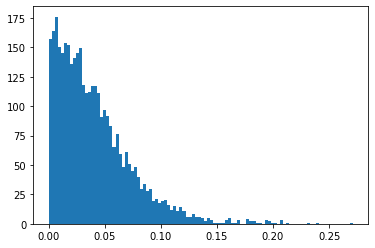

In [16]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
res = abs((y_test - y_pred)/y_test)
plt.hist(res,bins=100)
print('residuo',res.mean()*100);

In [17]:
print("R*2: %1.4f" % r2_score(y_test,y_pred))

R*2: 0.7752


<AxesSubplot:>

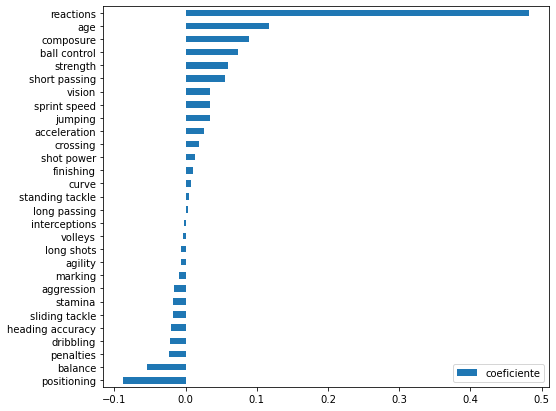

In [18]:
coef = regressor.coef_
coefs = pd.DataFrame(index = X_train.columns, 
                     data =coef,columns=['coeficiente'])
coefs.sort_values('coeficiente').plot.barh(figsize=(8,7))

In [19]:
messi = df[df.name == 'L. Messi']
print(messi.overall)
regressor.predict(messi[X])

1    93
Name: overall, dtype: int32


array([87.59657806])

In [20]:
Hirving = df[df.name == 'H. Lozano']
print(Hirving.overall)
regressor.predict(Hirving[X])

710    78
Name: overall, dtype: int32


array([75.32399352])

In [21]:
regressor.predict(Hirving[X])


array([75.32399352])

In [22]:
Hirving[X]

,age,acceleration,aggression,agility,balance,ball control,composure,crossing,curve,dribbling,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
710,21,94,42,92,76,77,76,74,69,83,...,75,71,75,25,93,80,27,57,72,71
